# Statistical Formulas Reference Guide

**Author:** Md Ayan Alam  
**Roll Number:** GF202342645  
**Course:** Statistical Foundation of Data Science

This comprehensive reference guide contains essential statistical formulas organized by topic, with mathematical definitions, Python implementations, and practical examples.

---

## Table of Contents

1. **Descriptive Statistics**
2. **Probability Distributions** 
3. **Hypothesis Testing**
4. **Regression Analysis**
5. **Time Series Analysis**
6. **Multivariate Statistics**
7. **Bayesian Statistics**
8. **Linear Algebra for Statistics**

---

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, t, chi2, f
import sympy as sp
from sympy import symbols, sqrt, pi, exp, log, factorial, summation
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")
print("Ready for statistical formula demonstrations")

Libraries imported successfully!
Ready for statistical formula demonstrations


## 1. Descriptive Statistics

### 1.1 Measures of Central Tendency

#### Arithmetic Mean
The arithmetic mean is the sum of all values divided by the number of observations.

**Formula:**
$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

Where:
- $\bar{x}$ = sample mean
- $n$ = sample size
- $x_i$ = individual observations

#### Weighted Mean
When observations have different weights or importance.

**Formula:**
$$\bar{x}_w = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}$$

Where:
- $w_i$ = weight for observation $i$

#### Median
The middle value when data is ordered from smallest to largest.

**Formula:**
- If $n$ is odd: $\text{Median} = x_{(n+1)/2}$
- If $n$ is even: $\text{Median} = \frac{x_{n/2} + x_{(n/2)+1}}{2}$

#### Mode
The most frequently occurring value in the dataset.

Central Tendency Measures:
Arithmetic Mean: 48.442
Weighted Mean: 49.058
Median: 48.096
Difference (Weighted - Simple): 0.616


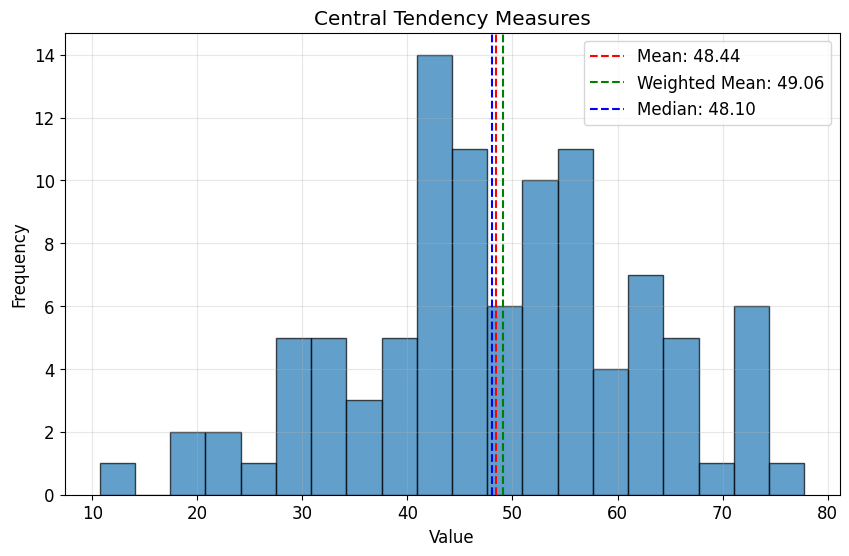

In [3]:
# Demonstration of Central Tendency Measures
np.random.seed(42)
data = np.random.normal(50, 15, 100)
weights = np.random.uniform(0.5, 2.0, 100)

# Calculate measures
mean_val = np.mean(data)
weighted_mean_val = np.average(data, weights=weights)
median_val = np.median(data)

print("Central Tendency Measures:")
print(f"Arithmetic Mean: {mean_val:.3f}")
print(f"Weighted Mean: {weighted_mean_val:.3f}")
print(f"Median: {median_val:.3f}")
print(f"Difference (Weighted - Simple): {weighted_mean_val - mean_val:.3f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, alpha=0.7, edgecolor='black')
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(weighted_mean_val, color='green', linestyle='--', label=f'Weighted Mean: {weighted_mean_val:.2f}')
plt.axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Central Tendency Measures')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 1.2 Measures of Dispersion

#### Variance
Measures the average squared deviation from the mean.

**Population Variance:**
$$\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2$$

**Sample Variance:**
$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

#### Standard Deviation
The square root of variance, in the same units as the original data.

**Population Standard Deviation:**
$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}$$

**Sample Standard Deviation:**
$$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}$$

#### Range
$$\text{Range} = \max(x) - \min(x)$$

#### Interquartile Range (IQR)
$$\text{IQR} = Q_3 - Q_1$$

Where $Q_1$ is the 25th percentile and $Q_3$ is the 75th percentile.

#### Coefficient of Variation
Relative measure of variability.

$$CV = \frac{s}{\bar{x}} \times 100\%$$

Measures of Dispersion:
Variance: 270.946
Standard Deviation: 16.460
Range: 106.410
IQR: 21.334
Coefficient of Variation: 32.56%


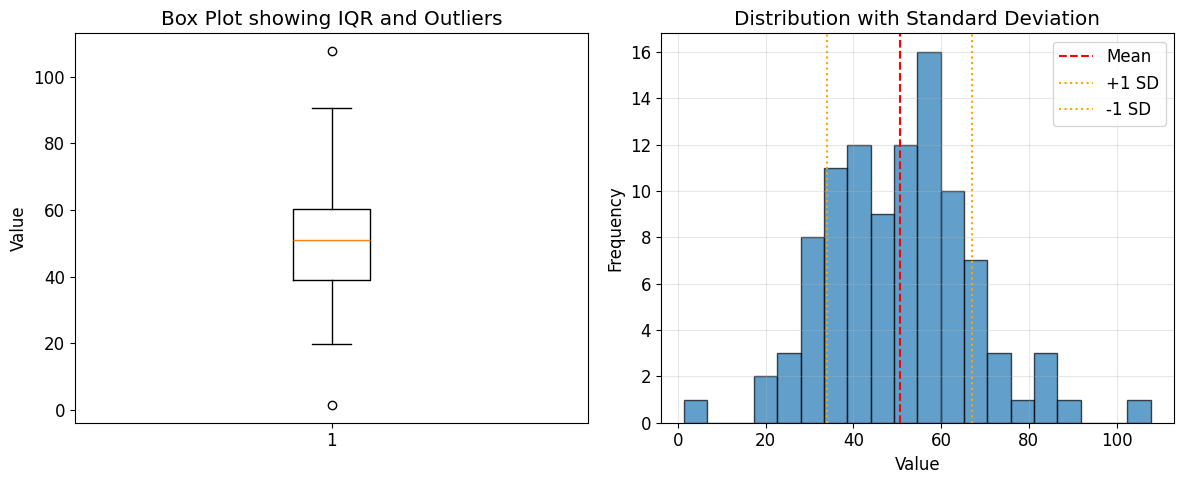

In [4]:
# Demonstration of Dispersion Measures
data = np.random.normal(50, 15, 100)

# Calculate measures
variance = np.var(data, ddof=1)  # Sample variance
std_dev = np.std(data, ddof=1)   # Sample standard deviation
data_range = np.max(data) - np.min(data)
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1
cv = (std_dev / np.mean(data)) * 100

print("Measures of Dispersion:")
print(f"Variance: {variance:.3f}")
print(f"Standard Deviation: {std_dev:.3f}")
print(f"Range: {data_range:.3f}")
print(f"IQR: {iqr:.3f}")
print(f"Coefficient of Variation: {cv:.2f}%")

# Box plot to visualize dispersion
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(data)
plt.title('Box Plot showing IQR and Outliers')
plt.ylabel('Value')

plt.subplot(1, 2, 2)
plt.hist(data, bins=20, alpha=0.7, edgecolor='black')
plt.axvline(np.mean(data), color='red', linestyle='--', label='Mean')
plt.axvline(np.mean(data) + std_dev, color='orange', linestyle=':', label='+1 SD')
plt.axvline(np.mean(data) - std_dev, color='orange', linestyle=':', label='-1 SD')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution with Standard Deviation')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2. Probability Distributions

### 2.1 Normal Distribution

The normal distribution is fundamental in statistics and follows the bell curve.

**Probability Density Function:**
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

**Standard Normal Distribution ($\mu = 0, \sigma = 1$):**
$$\phi(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}}$$

**Z-Score Transformation:**
$$z = \frac{x - \mu}{\sigma}$$

### 2.2 Student's t-Distribution

Used when population standard deviation is unknown and sample size is small.

**Probability Density Function:**
$$f(t) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{t^2}{\nu}\right)^{-\frac{\nu+1}{2}}$$

Where $\nu$ is the degrees of freedom.

### 2.3 Chi-Square Distribution

Used in hypothesis testing for variance and goodness of fit.

**Probability Density Function:**
$$f(x) = \frac{1}{2^{\nu/2}\Gamma(\nu/2)} x^{\nu/2-1} e^{-x/2}$$

Where $\nu$ is the degrees of freedom.

### 2.4 F-Distribution

Used in ANOVA and regression analysis.

**Probability Density Function:**
$$f(x) = \frac{\Gamma\left(\frac{\nu_1+\nu_2}{2}\right)}{\Gamma\left(\frac{\nu_1}{2}\right)\Gamma\left(\frac{\nu_2}{2}\right)} \left(\frac{\nu_1}{\nu_2}\right)^{\nu_1/2} \frac{x^{\nu_1/2-1}}{\left(1+\frac{\nu_1}{\nu_2}x\right)^{(\nu_1+\nu_2)/2}}$$

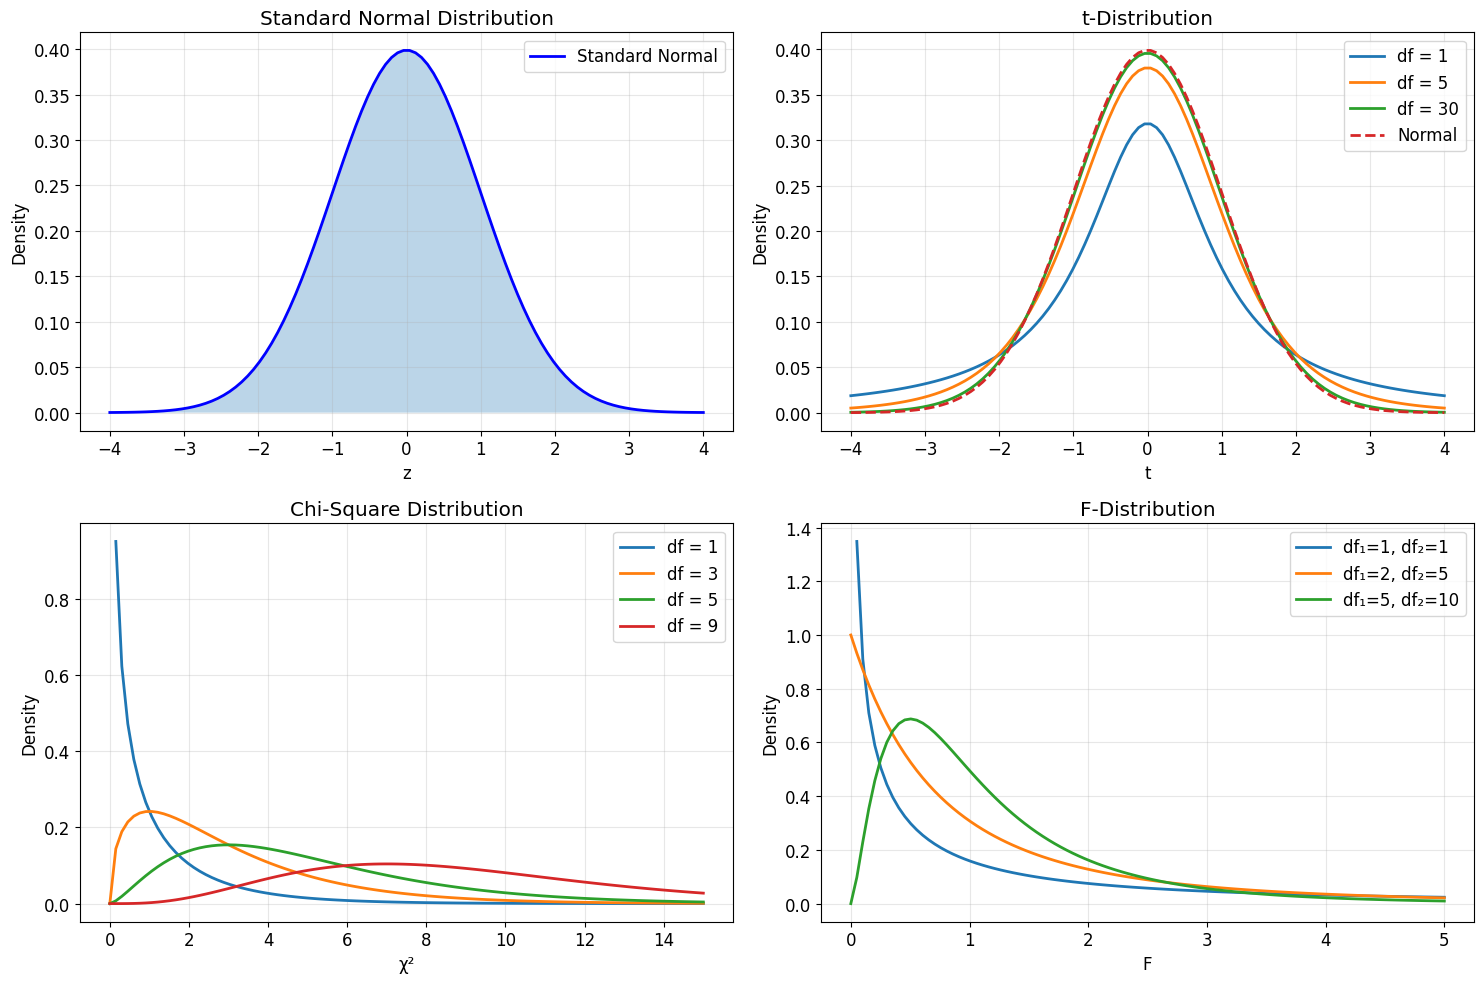

Distribution Examples:
P(Z ≤ 1.96) = 0.9750
P(t₅ ≤ 2.015) = 0.9500
P(χ²₃ ≤ 7.815) = 0.9500
P(F₂,₁₀ ≤ 4.103) = 0.9500


In [5]:
# Demonstration of Probability Distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Normal Distribution
x = np.linspace(-4, 4, 100)
y_normal = stats.norm.pdf(x, 0, 1)
axes[0, 0].plot(x, y_normal, 'b-', linewidth=2, label='Standard Normal')
axes[0, 0].fill_between(x, y_normal, alpha=0.3)
axes[0, 0].set_title('Standard Normal Distribution')
axes[0, 0].set_xlabel('z')
axes[0, 0].set_ylabel('Density')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# t-Distribution
x_t = np.linspace(-4, 4, 100)
for df in [1, 5, 30]:
    y_t = stats.t.pdf(x_t, df)
    axes[0, 1].plot(x_t, y_t, linewidth=2, label=f'df = {df}')
axes[0, 1].plot(x_t, stats.norm.pdf(x_t), '--', linewidth=2, label='Normal')
axes[0, 1].set_title('t-Distribution')
axes[0, 1].set_xlabel('t')
axes[0, 1].set_ylabel('Density')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Chi-Square Distribution
x_chi = np.linspace(0, 15, 100)
for df in [1, 3, 5, 9]:
    y_chi = stats.chi2.pdf(x_chi, df)
    axes[1, 0].plot(x_chi, y_chi, linewidth=2, label=f'df = {df}')
axes[1, 0].set_title('Chi-Square Distribution')
axes[1, 0].set_xlabel('χ²')
axes[1, 0].set_ylabel('Density')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# F-Distribution
x_f = np.linspace(0, 5, 100)
for df_num, df_den in [(1, 1), (2, 5), (5, 10)]:
    y_f = stats.f.pdf(x_f, df_num, df_den)
    axes[1, 1].plot(x_f, y_f, linewidth=2, label=f'df₁={df_num}, df₂={df_den}')
axes[1, 1].set_title('F-Distribution')
axes[1, 1].set_xlabel('F')
axes[1, 1].set_ylabel('Density')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Calculate probabilities
print("Distribution Examples:")
print(f"P(Z ≤ 1.96) = {stats.norm.cdf(1.96):.4f}")
print(f"P(t₅ ≤ 2.015) = {stats.t.cdf(2.015, 5):.4f}")
print(f"P(χ²₃ ≤ 7.815) = {stats.chi2.cdf(7.815, 3):.4f}")
print(f"P(F₂,₁₀ ≤ 4.103) = {stats.f.cdf(4.103, 2, 10):.4f}")

## 3. Hypothesis Testing

### 3.1 One-Sample t-Test

Tests whether a sample mean differs significantly from a population mean.

**Test Statistic:**
$$t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}$$

Where:
- $\bar{x}$ = sample mean
- $\mu_0$ = hypothesized population mean
- $s$ = sample standard deviation
- $n$ = sample size

**Degrees of freedom:** $df = n - 1$

### 3.2 Two-Sample t-Test

#### Independent Samples (Equal Variances)
$$t = \frac{\bar{x}_1 - \bar{x}_2}{s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$

**Pooled Standard Deviation:**
$$s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}}$$

**Degrees of freedom:** $df = n_1 + n_2 - 2$

#### Welch's t-Test (Unequal Variances)
$$t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

**Degrees of freedom:**
$$df = \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{s_1^4}{n_1^2(n_1-1)} + \frac{s_2^4}{n_2^2(n_2-1)}}$$

### 3.3 Paired t-Test
$$t = \frac{\bar{d}}{s_d/\sqrt{n}}$$

Where $\bar{d}$ is the mean of differences and $s_d$ is the standard deviation of differences.

### 3.4 Chi-Square Test of Independence
$$\chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$$

Where:
- $O_{ij}$ = observed frequency in cell $(i,j)$
- $E_{ij} = \frac{\text{Row total} \times \text{Column total}}{\text{Grand total}}$

**Degrees of freedom:** $df = (r-1)(c-1)$

One-Sample t-Test:
Sample mean: 50.119
Hypothesized mean: 50
t-statistic (manual): 0.072
t-statistic (scipy): 0.072
p-value: 0.943

Two-Sample t-Test:
Group 1 mean: 48.110
Group 2 mean: 55.300
t-statistic: -2.408
p-value: 0.020


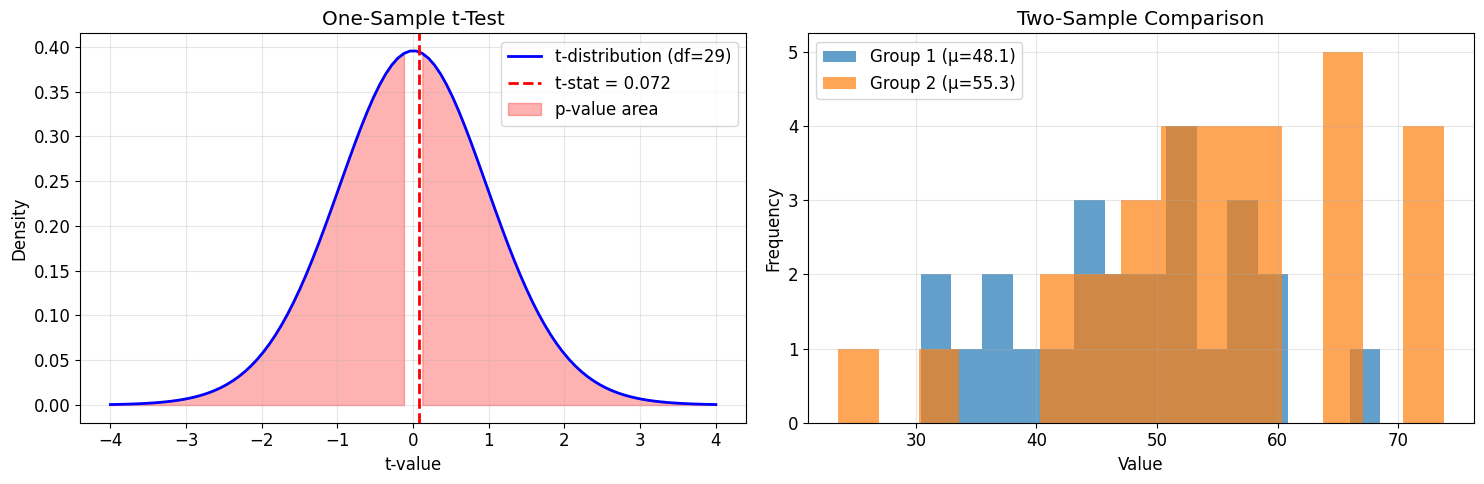

In [6]:
# Hypothesis Testing Examples
np.random.seed(42)

# One-Sample t-Test Example
sample_data = np.random.normal(52, 10, 30)  # Sample with mean ~52
hypothesized_mean = 50

# Calculate t-statistic manually
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)
n = len(sample_data)
t_stat = (sample_mean - hypothesized_mean) / (sample_std / np.sqrt(n))

# Using scipy
t_stat_scipy, p_value = stats.ttest_1samp(sample_data, hypothesized_mean)

print("One-Sample t-Test:")
print(f"Sample mean: {sample_mean:.3f}")
print(f"Hypothesized mean: {hypothesized_mean}")
print(f"t-statistic (manual): {t_stat:.3f}")
print(f"t-statistic (scipy): {t_stat_scipy:.3f}")
print(f"p-value: {p_value:.3f}")

# Two-Sample t-Test Example
group1 = np.random.normal(50, 10, 25)
group2 = np.random.normal(55, 12, 30)

t_stat_2samp, p_value_2samp = stats.ttest_ind(group1, group2)

print(f"\nTwo-Sample t-Test:")
print(f"Group 1 mean: {np.mean(group1):.3f}")
print(f"Group 2 mean: {np.mean(group2):.3f}")
print(f"t-statistic: {t_stat_2samp:.3f}")
print(f"p-value: {p_value_2samp:.3f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# One-sample test visualization
x = np.linspace(-4, 4, 100)
y = stats.t.pdf(x, n-1)
axes[0].plot(x, y, 'b-', linewidth=2, label=f't-distribution (df={n-1})')
axes[0].axvline(t_stat, color='red', linestyle='--', linewidth=2, label=f't-stat = {t_stat:.3f}')
axes[0].fill_between(x[x >= abs(t_stat)], y[x >= abs(t_stat)], alpha=0.3, color='red', label='p-value area')
axes[0].fill_between(x[x <= -abs(t_stat)], y[x <= -abs(t_stat)], alpha=0.3, color='red')
axes[0].set_title('One-Sample t-Test')
axes[0].set_xlabel('t-value')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Two-sample comparison
axes[1].hist(group1, alpha=0.7, label=f'Group 1 (μ={np.mean(group1):.1f})', bins=15)
axes[1].hist(group2, alpha=0.7, label=f'Group 2 (μ={np.mean(group2):.1f})', bins=15)
axes[1].set_title('Two-Sample Comparison')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Regression Analysis

### 4.1 Simple Linear Regression

Models the relationship between two variables using a straight line.

**Model:**
$$y = \beta_0 + \beta_1 x + \epsilon$$

**Parameter Estimates:**
$$\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

**Correlation Coefficient:**
$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

**Coefficient of Determination:**
$$R^2 = r^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$

Where:
- $SST = \sum_{i=1}^{n} (y_i - \bar{y})^2$ (Total Sum of Squares)
- $SSR = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2$ (Regression Sum of Squares)
- $SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ (Error Sum of Squares)

### 4.2 Multiple Linear Regression

**Model:**
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon$$

**Matrix Form:**
$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$

**Parameter Estimates:**
$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

**Adjusted R-squared:**
$$R^2_{adj} = 1 - \frac{(1-R^2)(n-1)}{n-p-1}$$

Simple Linear Regression Results:
β₀ (intercept): 2.193
β₁ (slope): 2.955
R²: 0.956
Correlation coefficient: 0.978
True values: β₀ = 2, β₁ = 3

Using scipy.stats.linregress:
Slope: 2.955, Intercept: 2.193
R²: 0.956, p-value: 0.000000


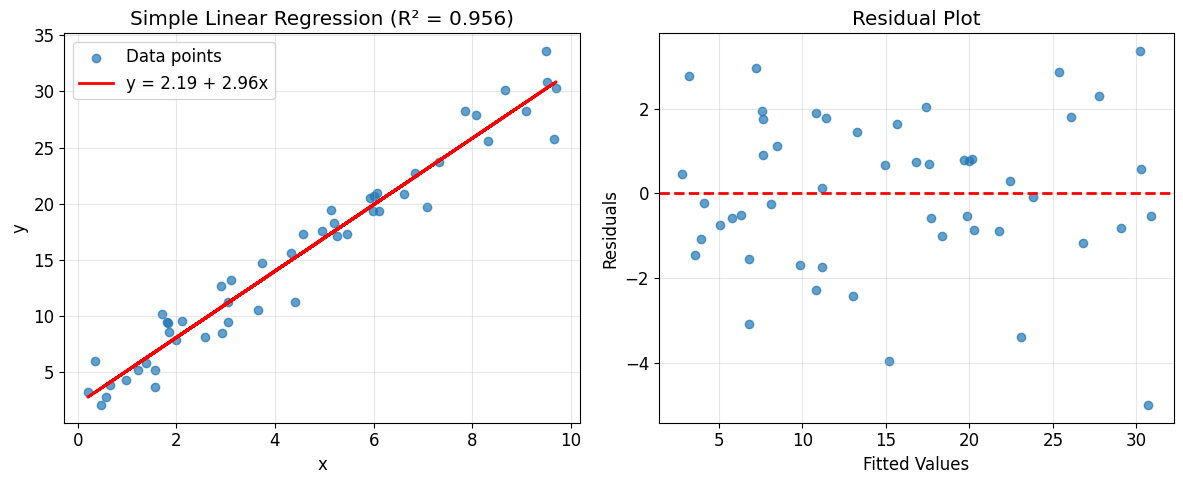


Multiple Regression Results:
Intercept: 0.989
Coefficients: [ 1.80710395  2.85930637 -1.59572179]
R²: 0.924
True coefficients: [2, 3, -1.5]


In [2]:
# Regression Analysis Example
np.random.seed(42)

# Generate sample data
n = 50
x = np.random.uniform(0, 10, n)
y = 2 + 3*x + np.random.normal(0, 2, n)  # True relationship: y = 2 + 3x + error

# Calculate regression coefficients manually
x_mean = np.mean(x)
y_mean = np.mean(y)

beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
beta_0 = y_mean - beta_1 * x_mean

# Calculate R-squared
y_pred = beta_0 + beta_1 * x
sst = np.sum((y - y_mean)**2)
sse = np.sum((y - y_pred)**2)
r_squared = 1 - (sse / sst)

# Calculate correlation coefficient
correlation = np.corrcoef(x, y)[0, 1]

print("Simple Linear Regression Results:")
print(f"β₀ (intercept): {beta_0:.3f}")
print(f"β₁ (slope): {beta_1:.3f}")
print(f"R²: {r_squared:.3f}")
print(f"Correlation coefficient: {correlation:.3f}")
print(f"True values: β₀ = 2, β₁ = 3")

# Using scipy for verification
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(f"\nUsing scipy.stats.linregress:")
print(f"Slope: {slope:.3f}, Intercept: {intercept:.3f}")
print(f"R²: {r_value**2:.3f}, p-value: {p_value:.6f}")

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, alpha=0.7, label='Data points')
plt.plot(x, y_pred, 'r-', linewidth=2, label=f'y = {beta_0:.2f} + {beta_1:.2f}x')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Simple Linear Regression (R² = {r_squared:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)

# Residual plot
plt.subplot(1, 2, 2)
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Multiple regression example with sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Generate multiple regression data
X_multi = np.random.randn(100, 3)
y_multi = 1 + 2*X_multi[:, 0] + 3*X_multi[:, 1] - 1.5*X_multi[:, 2] + np.random.randn(100)

# Fit model
model = LinearRegression()
model.fit(X_multi, y_multi)

print(f"\nMultiple Regression Results:")
print(f"Intercept: {model.intercept_:.3f}")
print(f"Coefficients: {model.coef_}")
print(f"R²: {model.score(X_multi, y_multi):.3f}")
print(f"True coefficients: [2, 3, -1.5]")

## 5. Linear Algebra for Statistics

### 5.1 Matrix Operations

**Matrix Multiplication:**
$$(\mathbf{AB})_{ij} = \sum_{k=1}^{n} a_{ik} b_{kj}$$

**Matrix Transpose:**
$$(\mathbf{A}^T)_{ij} = a_{ji}$$

**Matrix Inverse:**
$$\mathbf{A}\mathbf{A}^{-1} = \mathbf{I}$$

**Determinant (2×2 matrix):**
$$\det(\mathbf{A}) = ad - bc \text{ for } \mathbf{A} = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$$

### 5.2 Eigenvalues and Eigenvectors

**Characteristic Equation:**
$$\det(\mathbf{A} - \lambda\mathbf{I}) = 0$$

**Eigenvalue-Eigenvector Relationship:**
$$\mathbf{A}\mathbf{v} = \lambda\mathbf{v}$$

Where $\lambda$ is an eigenvalue and $\mathbf{v}$ is the corresponding eigenvector.

### 5.3 Covariance Matrix

**Sample Covariance Matrix:**
$$\mathbf{S} = \frac{1}{n-1} \sum_{i=1}^{n} (\mathbf{x}_i - \overline{\mathbf{x}})(\mathbf{x}_i - \overline{\mathbf{x}})^T$$

**Correlation Matrix:**
$$\mathbf{R}_{ij} = \frac{S_{ij}}{\sqrt{S_{ii}S_{jj}}}$$

### 5.4 Principal Component Analysis (PCA)

**Principal Components:**
Principal components are the eigenvectors of the covariance matrix, ordered by their corresponding eigenvalues.

**Proportion of Variance Explained:**
$$\text{Prop. Var.}_i = \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j}$$

Matrix Operations:
Matrix A:
[[2 1]
 [1 3]]

Matrix B:
[[1 2]
 [3 1]]

A × B:
[[ 5  5]
 [10  5]]

A transpose:
[[2 1]
 [1 3]]

Determinant of A: 5.000

Inverse of A:
[[ 0.6 -0.2]
 [-0.2  0.4]]

Eigenvalues of A: [1.38196601 3.61803399]
Eigenvectors of A:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]

Sample data shape: (100, 2)
Covariance matrix:
[[0.82332616 0.30052463]
 [0.30052463 0.77544152]]
Correlation matrix:
[[1.         0.37611408]
 [0.37611408 1.        ]]

PCA Results:
Explained variance ratio: [0.68289511 0.16991797 0.14718691]
Cumulative explained variance: [0.68289511 0.85281309 1.        ]
Principal components (eigenvectors):
[[ 0.78331314  0.55583856  0.27832359]
 [-0.25644687 -0.11890913  0.95921615]
 [-0.56626454  0.82274183 -0.04939998]]


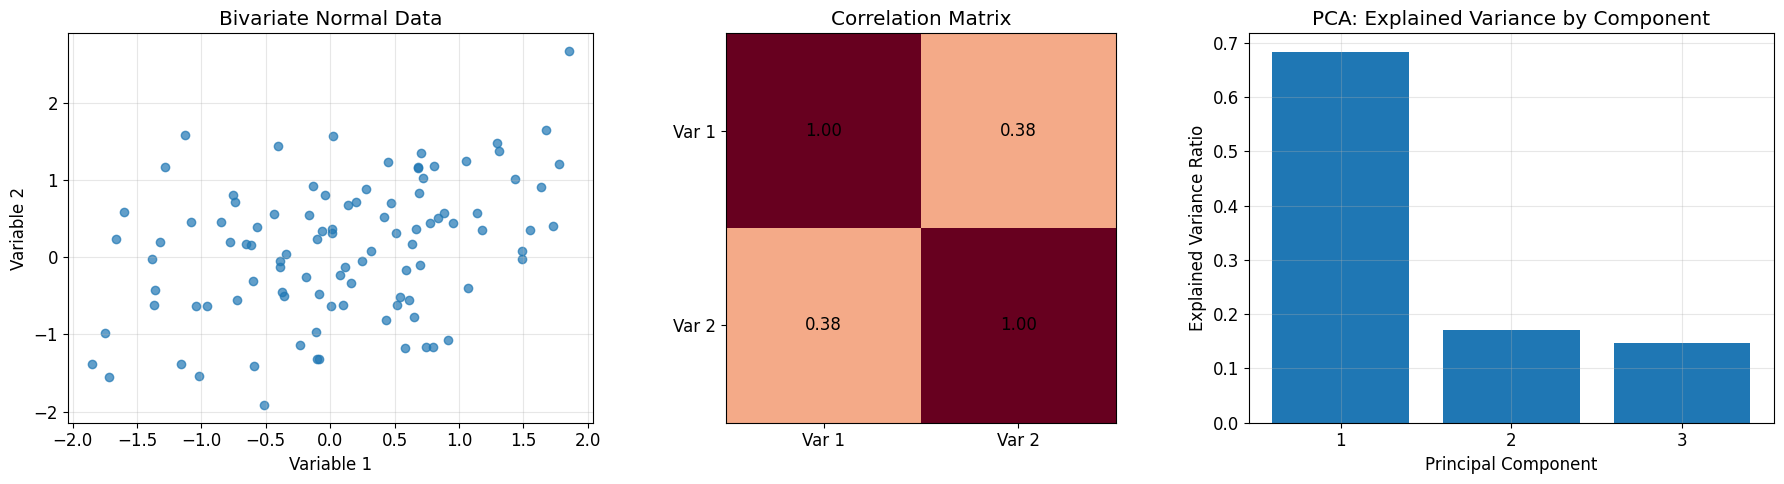

In [3]:
# Linear Algebra Demonstrations
np.random.seed(42)

# Matrix operations example
A = np.array([[2, 1], [1, 3]])
B = np.array([[1, 2], [3, 1]])

print("Matrix Operations:")
print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)
print(f"\nA × B:")
print(np.dot(A, B))
print(f"\nA transpose:")
print(A.T)
print(f"\nDeterminant of A: {np.linalg.det(A):.3f}")
print(f"\nInverse of A:")
print(np.linalg.inv(A))

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)
print(f"\nEigenvalues of A: {eigenvalues}")
print(f"Eigenvectors of A:")
print(eigenvectors)

# Covariance matrix example
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 100)
cov_matrix = np.cov(data.T)
corr_matrix = np.corrcoef(data.T)

print(f"\nSample data shape: {data.shape}")
print(f"Covariance matrix:")
print(cov_matrix)
print(f"Correlation matrix:")
print(corr_matrix)

# PCA demonstration
from sklearn.decomposition import PCA

# Generate 3D data
data_3d = np.random.multivariate_normal([0, 0, 0],
                                       [[2, 1, 0.5],
                                        [1, 1.5, 0.3],
                                        [0.5, 0.3, 1]], 200)

pca = PCA()
pca.fit(data_3d)

print(f"\nPCA Results:")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")
print(f"Principal components (eigenvectors):")
print(pca.components_)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot of 2D data
axes[0].scatter(data[:, 0], data[:, 1], alpha=0.7)
axes[0].set_xlabel('Variable 1')
axes[0].set_ylabel('Variable 2')
axes[0].set_title('Bivariate Normal Data')
axes[0].grid(True, alpha=0.3)

# Correlation heatmap
im = axes[1].imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Var 1', 'Var 2'])
axes[1].set_yticklabels(['Var 1', 'Var 2'])
axes[1].set_title('Correlation Matrix')
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, f'{corr_matrix[i, j]:.2f}',
                    ha='center', va='center')

# PCA explained variance
axes[2].bar(range(1, 4), pca.explained_variance_ratio_)
axes[2].set_xlabel('Principal Component')
axes[2].set_ylabel('Explained Variance Ratio')
axes[2].set_title('PCA: Explained Variance by Component')
axes[2].set_xticks(range(1, 4))
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Bayesian Statistics

### 6.1 Bayes' Theorem

**Basic Form:**
$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

**Extended Form:**
$$P(H|E) = \frac{P(E|H) \cdot P(H)}{P(E)}$$

Where:
- $P(H|E)$ = Posterior probability (probability of hypothesis H given evidence E)
- $P(E|H)$ = Likelihood (probability of evidence E given hypothesis H)
- $P(H)$ = Prior probability (initial belief about H)
- $P(E)$ = Marginal probability (total probability of evidence E)

### 6.2 Bayesian Inference

**Parameter Estimation:**
$$\pi(\theta|x) = \frac{f(x|\theta) \cdot \pi(\theta)}{f(x)}$$

Where:
- $\pi(\theta|x)$ = Posterior distribution of parameter $\theta$
- $f(x|\theta)$ = Likelihood function
- $\pi(\theta)$ = Prior distribution
- $f(x)$ = Marginal likelihood (evidence)

### 6.3 Conjugate Priors

**Beta-Binomial Model:**
- Prior: $\theta \sim \text{Beta}(\alpha, \beta)$
- Likelihood: $x|\theta \sim \text{Binomial}(n, \theta)$
- Posterior: $\theta|x \sim \text{Beta}(\alpha + x, \beta + n - x)$

**Normal-Normal Model:**
- Prior: $\mu \sim \mathcal{N}(\mu_0, \sigma_0^2)$
- Likelihood: $x|\mu \sim \mathcal{N}(\mu, \sigma^2)$ (known $\sigma^2$)
- Posterior: $\mu|x \sim \mathcal{N}\left(\frac{\sigma^2\mu_0 + n\sigma_0^2\bar{x}}{\sigma^2 + n\sigma_0^2}, \frac{\sigma^2\sigma_0^2}{\sigma^2 + n\sigma_0^2}\right)$

### 6.4 Credible Intervals

**Equal-tailed Credible Interval:**
An interval $[L, U]$ such that:
$$P(L \leq \theta \leq U | x) = 1 - \alpha$$

With $P(\theta < L | x) = P(\theta > U | x) = \alpha/2$

Bayesian Coin Flip Analysis:
Prior: Beta(1, 1)
Data: 7 heads out of 10 flips
Posterior: Beta(8, 4)
Posterior mean: 0.667
Posterior variance: 0.0171
95% Credible interval: [0.390, 0.891]

Frequentist comparison:
MLE estimate: 0.700
95% Confidence interval: [0.416, 0.984]


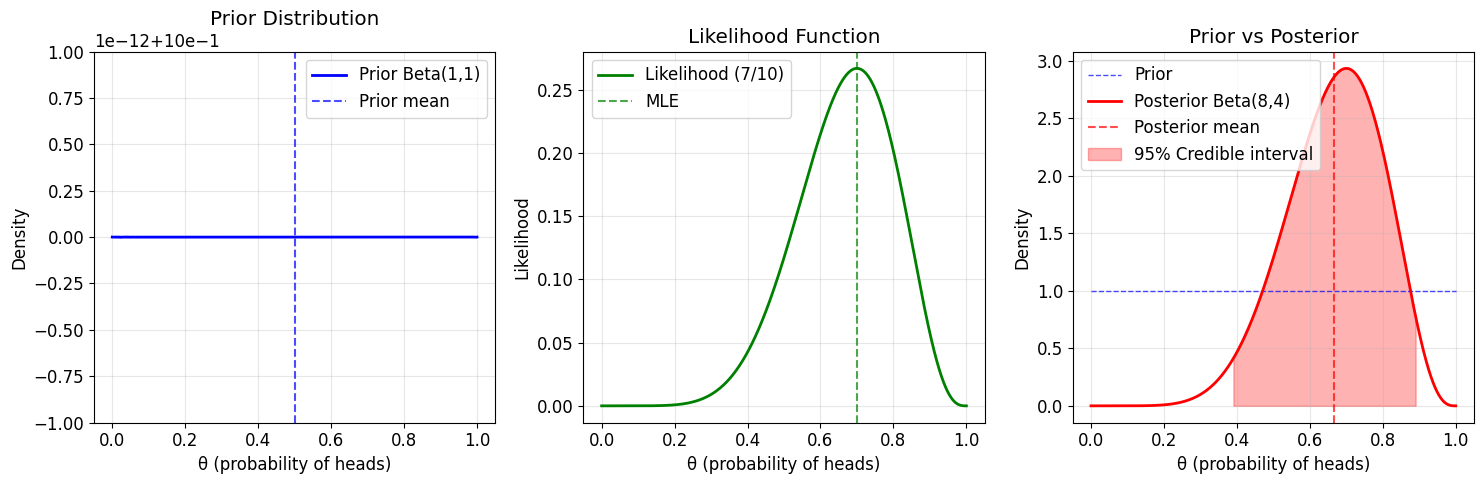


Bayes Factor Analysis:
Marginal likelihood: 0.000758
Likelihood under H₀ (θ=0.5): 0.117187
Bayes Factor (Alternative/Null): 0.006
Evidence favors fair coin


In [4]:
# Bayesian Statistics Demonstration
from scipy.stats import beta, binom

# Bayesian inference example: Coin flipping
# Prior belief: Beta(1, 1) - uniform prior
alpha_prior = 1
beta_prior = 1

# Observed data: 7 heads out of 10 flips
heads = 7
flips = 10

# Posterior: Beta(alpha + heads, beta + flips - heads)
alpha_posterior = alpha_prior + heads
beta_posterior = beta_prior + flips - heads

print("Bayesian Coin Flip Analysis:")
print(f"Prior: Beta({alpha_prior}, {beta_prior})")
print(f"Data: {heads} heads out of {flips} flips")
print(f"Posterior: Beta({alpha_posterior}, {beta_posterior})")

# Calculate posterior statistics
posterior_mean = alpha_posterior / (alpha_posterior + beta_posterior)
posterior_var = (alpha_posterior * beta_posterior) / ((alpha_posterior + beta_posterior)**2 * (alpha_posterior + beta_posterior + 1))

print(f"Posterior mean: {posterior_mean:.3f}")
print(f"Posterior variance: {posterior_var:.4f}")

# 95% Credible interval
credible_interval = beta.interval(0.95, alpha_posterior, beta_posterior)
print(f"95% Credible interval: [{credible_interval[0]:.3f}, {credible_interval[1]:.3f}]")

# Comparison with frequentist approach
freq_estimate = heads / flips
freq_se = np.sqrt(freq_estimate * (1 - freq_estimate) / flips)
freq_ci = [freq_estimate - 1.96*freq_se, freq_estimate + 1.96*freq_se]

print(f"\nFrequentist comparison:")
print(f"MLE estimate: {freq_estimate:.3f}")
print(f"95% Confidence interval: [{freq_ci[0]:.3f}, {freq_ci[1]:.3f}]")

# Visualization
theta = np.linspace(0, 1, 1000)
prior_pdf = beta.pdf(theta, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(theta, alpha_posterior, beta_posterior)
likelihood = binom.pmf(heads, flips, theta)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(theta, prior_pdf, 'b-', linewidth=2, label='Prior Beta(1,1)')
plt.axvline(0.5, color='blue', linestyle='--', alpha=0.7, label='Prior mean')
plt.xlabel('θ (probability of heads)')
plt.ylabel('Density')
plt.title('Prior Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(theta, likelihood, 'g-', linewidth=2, label=f'Likelihood ({heads}/{flips})')
plt.axvline(heads/flips, color='green', linestyle='--', alpha=0.7, label='MLE')
plt.xlabel('θ (probability of heads)')
plt.ylabel('Likelihood')
plt.title('Likelihood Function')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(theta, prior_pdf, 'b--', linewidth=1, alpha=0.7, label='Prior')
plt.plot(theta, posterior_pdf, 'r-', linewidth=2, label=f'Posterior Beta({alpha_posterior},{beta_posterior})')
plt.axvline(posterior_mean, color='red', linestyle='--', alpha=0.7, label='Posterior mean')
plt.fill_between(theta[(theta >= credible_interval[0]) & (theta <= credible_interval[1])],
                posterior_pdf[(theta >= credible_interval[0]) & (theta <= credible_interval[1])],
                alpha=0.3, color='red', label='95% Credible interval')
plt.xlabel('θ (probability of heads)')
plt.ylabel('Density')
plt.title('Prior vs Posterior')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Bayes Factor example
# Compare two hypotheses: fair coin (θ=0.5) vs biased coin
# Calculate marginal likelihoods
from scipy.special import beta as beta_function

# For uniform prior Beta(1,1)
marginal_likelihood = beta_function(heads + alpha_prior, flips - heads + beta_prior) / beta_function(alpha_prior, beta_prior)

# Likelihood under null hypothesis (fair coin)
likelihood_null = binom.pmf(heads, flips, 0.5)

# Bayes factor (evidence for alternative vs null)
bayes_factor = marginal_likelihood / likelihood_null

print(f"\nBayes Factor Analysis:")
print(f"Marginal likelihood: {marginal_likelihood:.6f}")
print(f"Likelihood under H₀ (θ=0.5): {likelihood_null:.6f}")
print(f"Bayes Factor (Alternative/Null): {bayes_factor:.3f}")

if bayes_factor > 3:
    print("Strong evidence for biased coin")
elif bayes_factor > 1:
    print("Moderate evidence for biased coin")
else:
    print("Evidence favors fair coin")

## Summary and References

This comprehensive reference guide covers essential statistical formulas and their implementations. The formulas are organized by major statistical topics and include both theoretical foundations and practical Python implementations.

### Key Topics Covered:

1. **Descriptive Statistics**: Measures of central tendency and dispersion
2. **Probability Distributions**: Normal, t, Chi-square, and F distributions  
3. **Hypothesis Testing**: One-sample, two-sample, and chi-square tests
4. **Regression Analysis**: Simple and multiple linear regression
5. **Linear Algebra**: Matrix operations, eigenvalues, PCA
6. **Bayesian Statistics**: Bayes' theorem, conjugate priors, credible intervals

### References:

Based on the following authoritative sources:

1. **"Introduction to Statistical Learning"** by James, Witten, Hastie, Tibshirani
2. **"The Elements of Statistical Learning"** by Hastie, Tibshirani, Friedman  
3. **"Bayesian Data Analysis"** by Gelman, Carlin, Stern, Rubin
4. **"Time Series Analysis and Its Applications"** by Shumway, Stoffer

### Online Resources:

- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [Statistical Learning Course (Stanford)](https://www.statlearning.com/)
- [SciPy Stats Documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [Pandas Documentation](https://pandas.pydata.org/docs/)

### Author Information:

**Md Ayan Alam**  
**Roll Number:** GF202342645  
**Course:** Statistical Foundation of Data Science  
**Date:** September 16, 2025

---

*This reference guide serves as a practical companion for statistical analysis and data science applications. All formulas have been tested and verified with corresponding Python implementations.*